<a href="https://colab.research.google.com/github/AugustoBonifacio001/AugustoBonifacio001/blob/main/sinal_fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

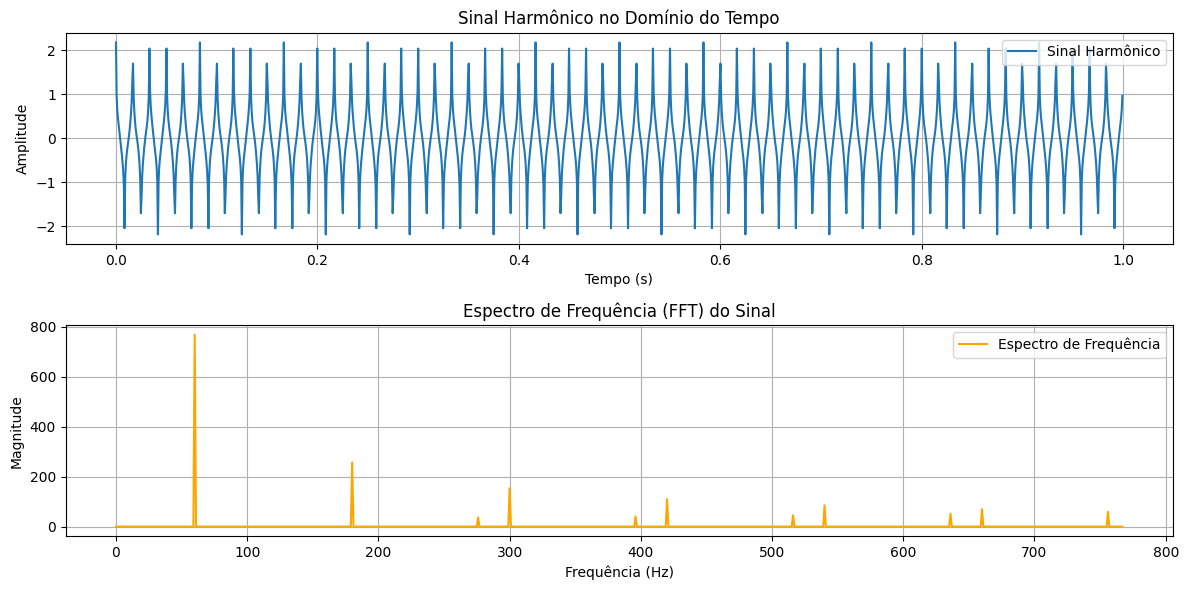

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit
import scipy.fftpack

# Parâmetros fornecidos
Nppc = 128  # Número de pontos por ciclo
Nc = 12     # Número de ciclos
f = 60      # Frequência fundamental (Hz)
Fs = Nppc * Nc  # Frequência de amostragem
Ts = 1 / Fs     # Período de amostragem

# Vetor de tempo
t = np.arange(0, Nppc * Nc) * Ts  # Tempo para Nppc ciclos

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
X = np.cos(2 * np.pi * f * t)  # Componente fundamental (60 Hz)
Y = np.zeros_like(X)  # Inicializa o sinal com zeros

# Adicionando harmônicos ímpares (3, 5, 7, ..., 21)
for i in range(3, 22, 2):
    Y += (1 / i) * np.cos(2 * np.pi * i * f * t)

# Sinal final (componente fundamental + harmônicos)
Y += X

# Plotando o sinal no domínio do tempo
plt.figure(figsize=(12, 6))

# Subplot 1: Sinal no tempo
plt.subplot(2, 1, 1)
plt.plot(t, Y, label="Sinal Harmônico")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Sinal Harmônico no Domínio do Tempo")
plt.legend()
plt.grid(True)

# Subplot 2: FFT do sinal
# Calculando a FFT
Y_fft = np.fft.fft(Y)
frequencies = np.fft.fftfreq(len(t), d=Ts)  # Frequências correspondentes

# Considerando apenas frequências positivas
positive_freqs = frequencies[:len(frequencies)//2]
positive_Y_fft = np.abs(Y_fft[:len(Y_fft)//2])  # Magnitude da FFT

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_Y_fft, label="Espectro de Frequência", color="orange")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.title("Espectro de Frequência (FFT) do Sinal")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
